In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
sns.set(rc={'figure.figsize':(8,6)})

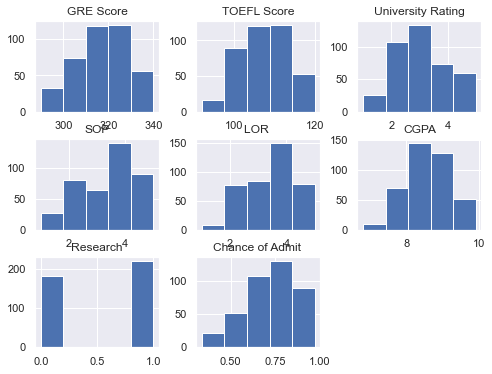

In [2]:
data=pd.read_csv('college_admissions.csv')
data.drop("Serial No.",axis=1,inplace=True)
data.columns
df = data.copy()
hist = data.hist(bins=5)

In [3]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [4]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
data.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

<AxesSubplot:>

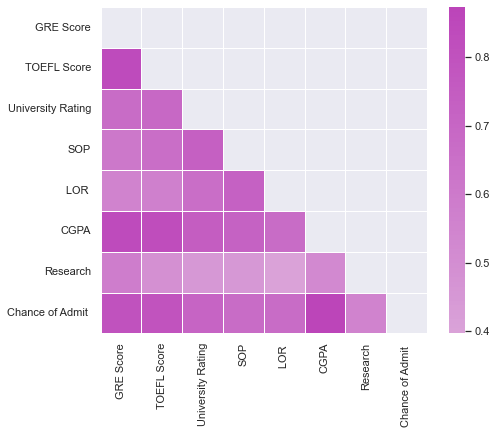

In [6]:
corr=df.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
f,ax = plt.subplots(figsize=(8,6))
cmap = sns.diverging_palette(500000,42069, as_cmap=True)
sns.heatmap(corr,cmap=cmap,mask=mask,linewidth=0.5,square=True,center=0)

<AxesSubplot:>

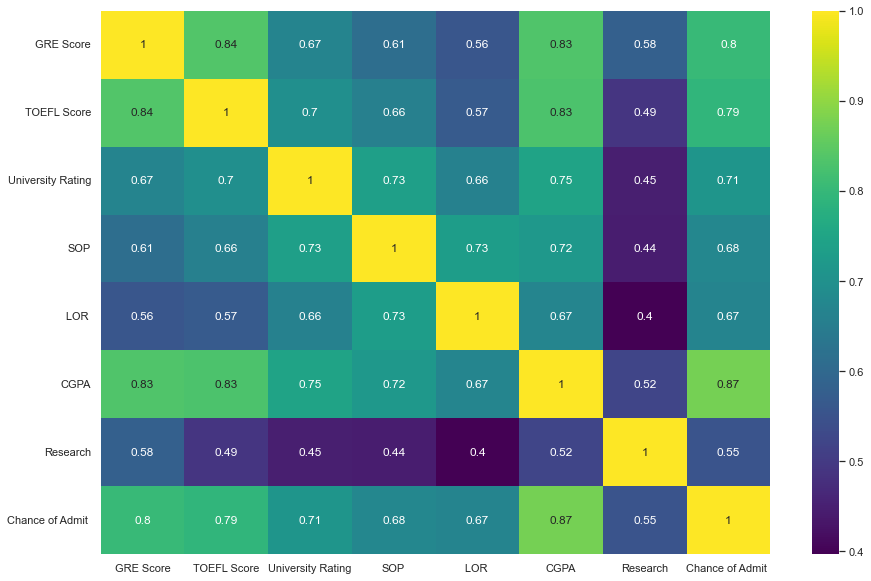

In [7]:
plt.figure(figsize=(15,10))

sns.heatmap(data.corr(),annot=True,cmap='viridis')

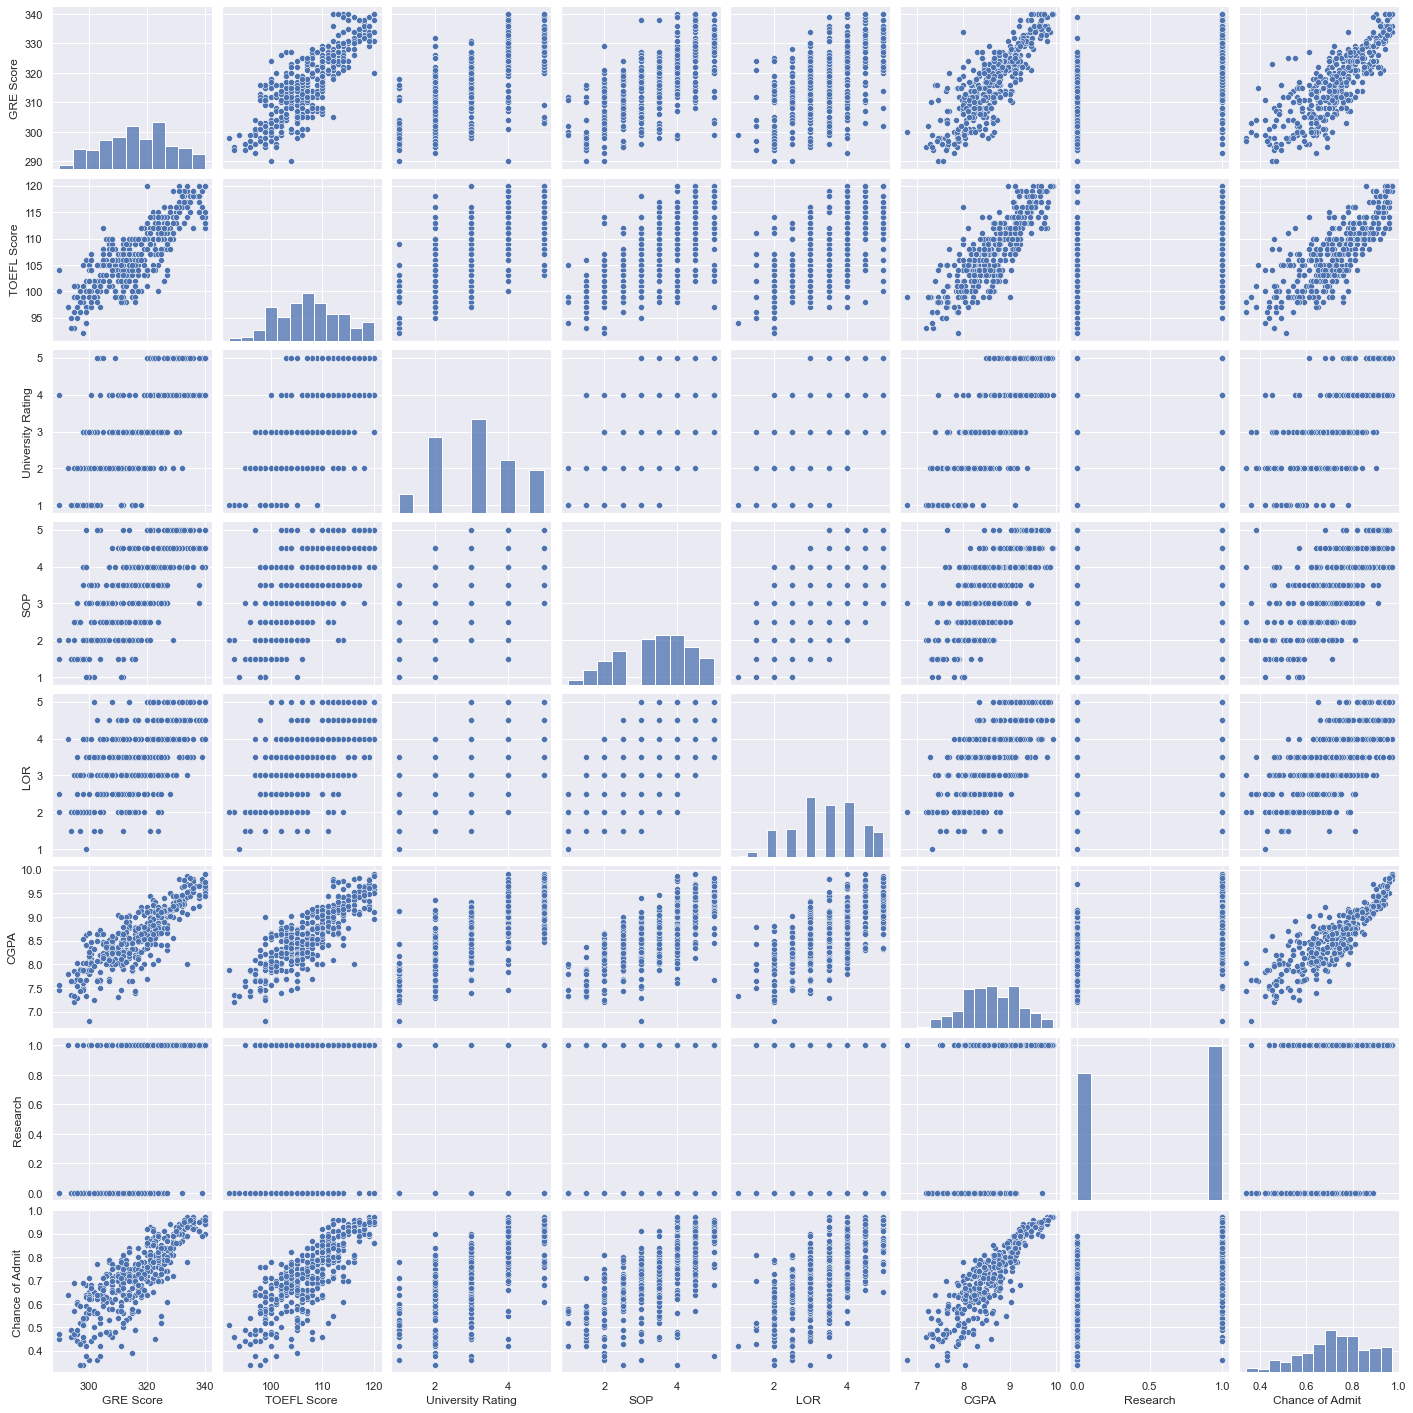

In [8]:
sns.pairplot(data);

In [9]:
corr

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


### You can clearly see the correlation between Chance of Admit and GRE, TOEFL and CGPA score

In [10]:
newdata = data[['CGPA','GRE Score','TOEFL Score','University Rating']]
newdata2 = data[['CGPA','University Rating']]
newdata3 = data[['GRE Score','TOEFL Score']]

<AxesSubplot:>

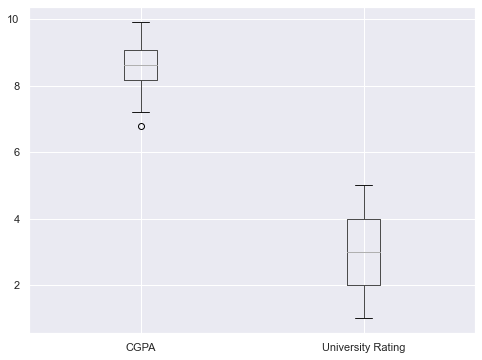

In [11]:
newdata2.boxplot(return_type='axes')

<AxesSubplot:>

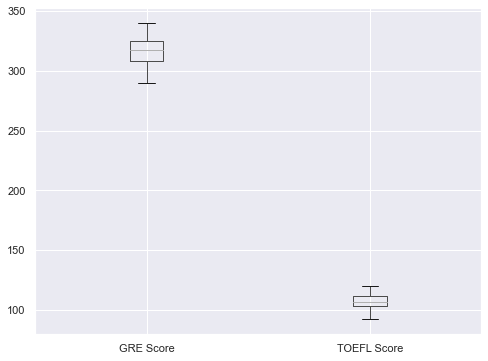

In [12]:
newdata3.boxplot(return_type='axes')

## As you can see, GRE, TOEFL and CGPA are the top three contributors to the predictions

#### There seem to be no outliers or irregularities in data

# Linear Regression

In [14]:
train_errorsL = []
test_errorsL = []
X = data.copy();
X.drop('Chance of Admit ',axis = 1,inplace = True)
y = data['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
# ss = StandardScaler()
# X_train = ss.fit_transform(X_train)
# X_test = ss.transform(X_test)
model = LinearRegression()
accuracy = model.fit(X_train, y_train).score(X_train, y_train)
train_errorsL.append(1-accuracy)
print('Training Accuracy: ',accuracy)
print('Training error: ',1-accuracy)
y_predlr = model.predict(X_test)
mse = mean_squared_error(y_predlr,y_test)
test_errorsL.append(mse)
print('Test MSE: ',mse)

Training Accuracy:  0.8173578298698679
Training error:  0.18264217013013206
Test MSE:  0.00480515656978521


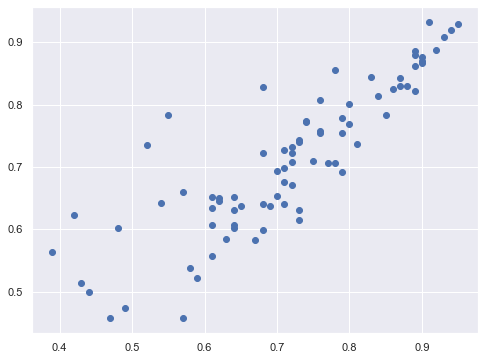

In [15]:
plt.scatter(y_test,y_predlr)
plt.show()

##### The task asks for a decision boundary. I dont understand how a decision boundary can be drawn for a regression model

# PCA of 2 dimensions

In [16]:
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X2D, y, test_size=0.2,random_state=0)
model2 = LinearRegression()
accuracy = model2.fit(X_train, y_train).score(X_train, y_train)

train_errorsL.append(1-accuracy)
print('Training Accuracy: ',accuracy)
print('Training error: ',1-accuracy)
y_pred = model2.predict(X_test)
mse = mean_squared_error(y_pred,y_test)
print('Test MSE: ',mse)
test_errorsL.append(mse)

Training Accuracy:  0.7114029809532896
Training error:  0.2885970190467104
Test MSE:  0.006683889489170208


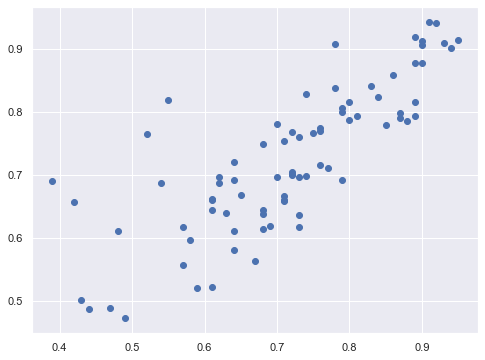

In [17]:
plt.scatter(y_test,y_pred)
plt.show()

In [18]:
final_preds = pd.DataFrame(
{'LinearAllfeatures': y_predlr,
  'PCA2D':y_pred  
}
)
final_preds.to_csv('preds.csv')

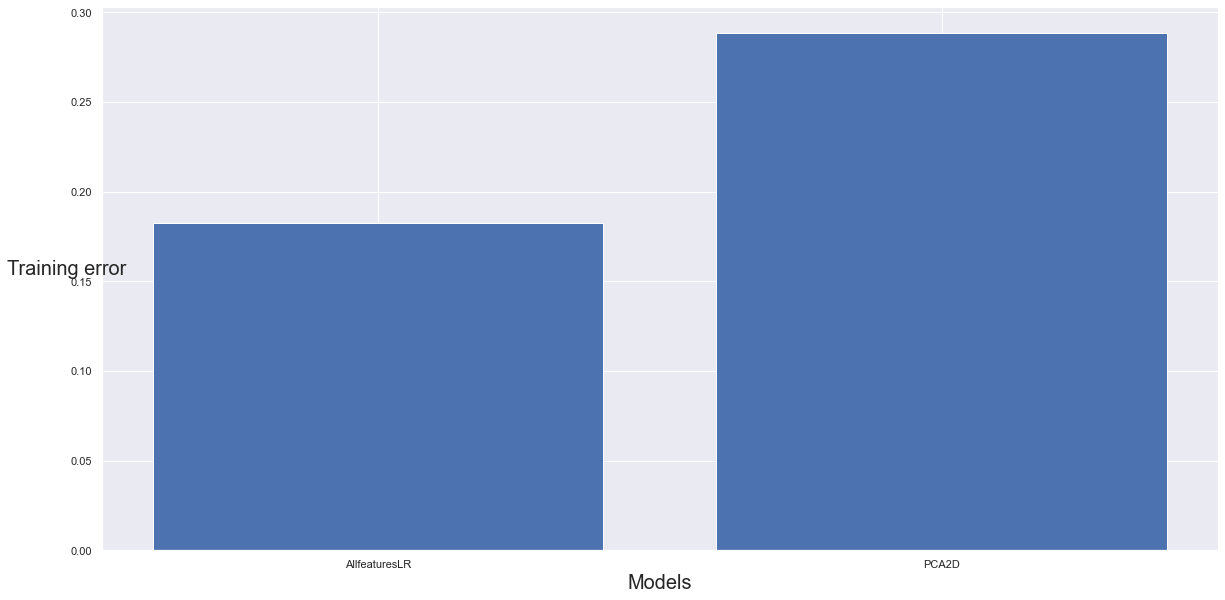

In [19]:
model_list = ['AllfeaturesLR','PCA2D']
plt.figure(figsize=(20, 10))
plt.bar(model_list, train_errorsL)
plt.xlabel('Models', fontsize=20)
plt.ylabel('Training error', fontsize=20, rotation=0)
plt.show()

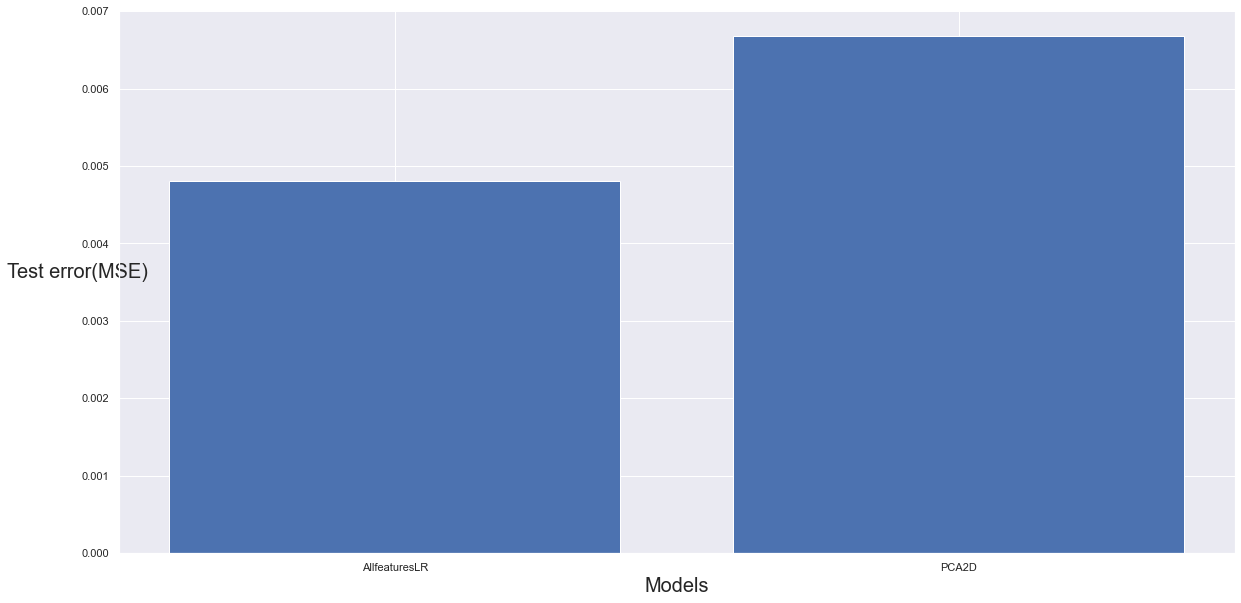

In [20]:
model_list = ['AllfeaturesLR','PCA2D']
plt.figure(figsize=(20, 10))
plt.bar(model_list, test_errorsL)
plt.xlabel('Models', fontsize=20)
plt.ylabel('Test error(MSE)', fontsize=20, rotation=0)
plt.show()

# The model with all the features does perform a little better. But it would not be wise to do that with data with thousands of dimensions. As the performance is more or less similar with lesser dimensions, it is better to use PCA to reduce the dimensions of the data so that it is easier for the machine to detect patterns